In [48]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [3]:
power_demand = pd.read_csv('./data/power_demand_interpolated.csv')
power_demand['기준일시'] = pd.to_datetime(power_demand['기준일시'])
power_demand.rename(columns={'기준일시':'datetime', '현재수요(MW)':'load'}, inplace=True)

In [5]:
power_demand = power_demand.set_index("datetime")

In [9]:
power_demand = power_demand.loc['2020-01-01':'2023-03-19']

In [108]:
test_result_1week_adjusted = sm.tsa.stattools.acf(power_demand['load'], nlags=2016, fft=False, adjusted=True)
test_result_3mon_adjusted = sm.tsa.stattools.acf(power_demand['load'], nlags=26208, fft=False, adjusted=True)
test_result_6mon_adjusted = sm.tsa.stattools.acf(power_demand['load'], nlags=52416, fft=False, adjusted=True)
test_result_year_adjusted = sm.tsa.stattools.acf(power_demand['load'], nlags=104832, fft=False, adjusted=True)

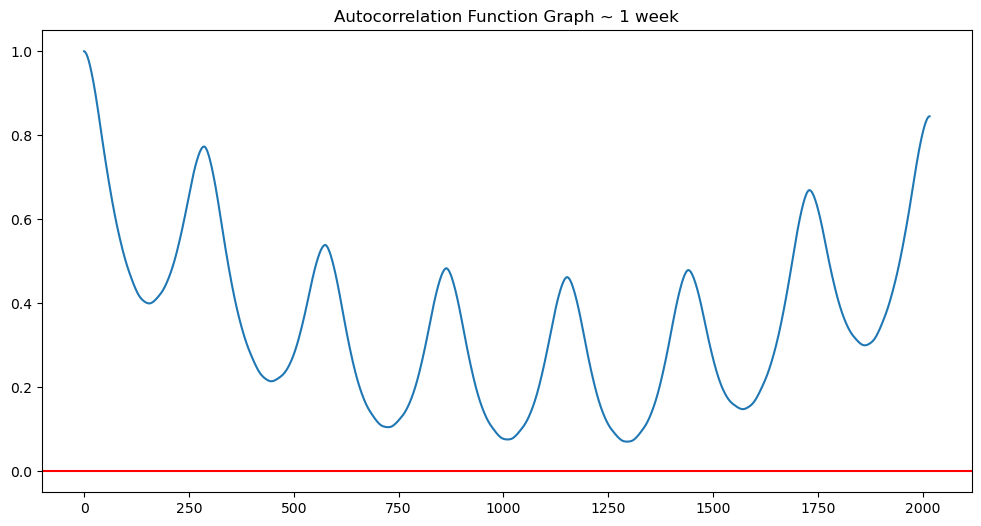

In [109]:
plt.figure(figsize=(12,6))
plt.plot(test_result_1week_adjusted)
plt.axhline(y=0, color='red')
plt.title("Autocorrelation Function Graph ~ 1 week")
plt.show()

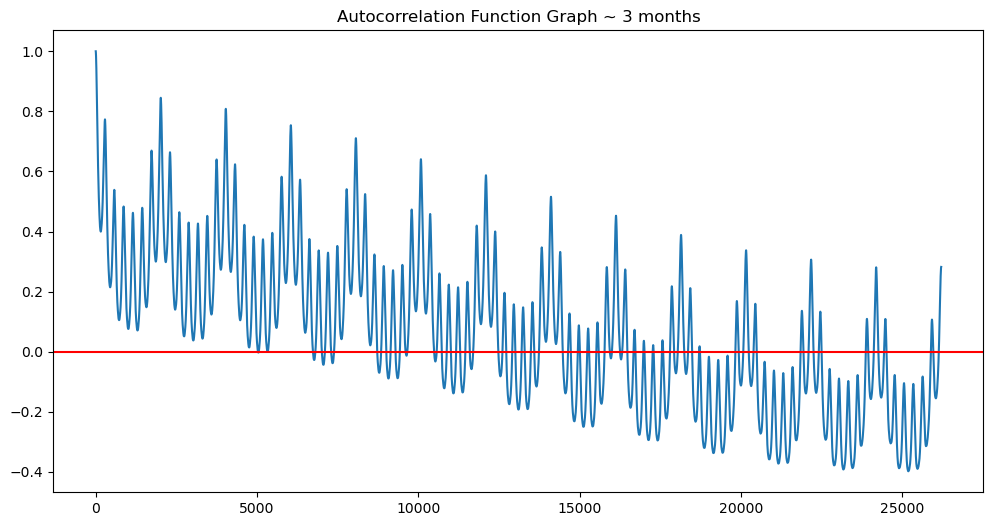

In [110]:
plt.figure(figsize=(12,6))
plt.plot(test_result_3mon_adjusted)
plt.axhline(y=0, color='red')
plt.title("Autocorrelation Function Graph ~ 3 months")
plt.show()

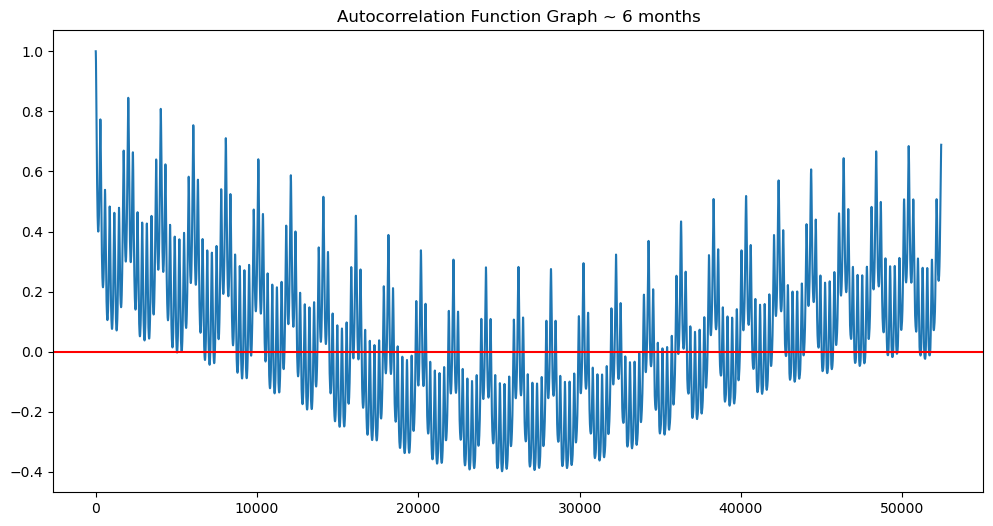

In [111]:
plt.figure(figsize=(12,6))
plt.plot(test_result_6mon_adjusted)
plt.axhline(y=0, color='red')
plt.title("Autocorrelation Function Graph ~ 6 months")
plt.show()

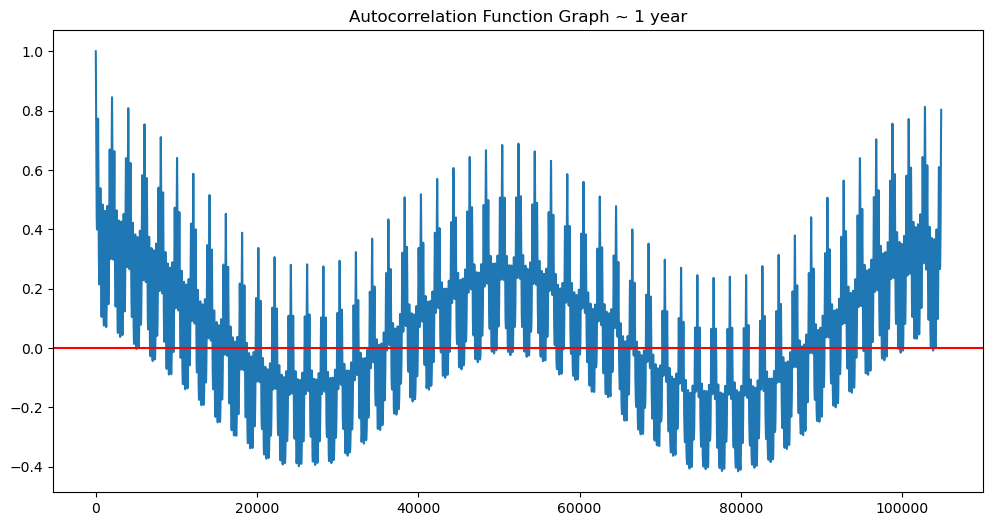

In [112]:
plt.figure(figsize=(12,6))
plt.plot(test_result_year_adjusted)
plt.axhline(y=0, color='red')
plt.title("Autocorrelation Function Graph ~ 1 year")
plt.show()